In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from matplotlib import cm
from scipy.stats import multivariate_normal
from qiskit import QuantumCircuit
from qiskit.circuit.library import EfficientSU2
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.utils import algorithm_globals
from qiskit_machine_learning.gradients import ParamShiftSamplerGradient

sampler = Sampler()
sampler_gradient = ParamShiftSamplerGradient(sampler=sampler)




ImportError: cannot import name 'init_observable' from 'qiskit.primitives.utils' (c:\Users\kafar\OneDrive\Documents\QT 608 - Quantum Computing\Qiskit\Qworld\qisvenv\Lib\site-packages\qiskit\primitives\utils.py)

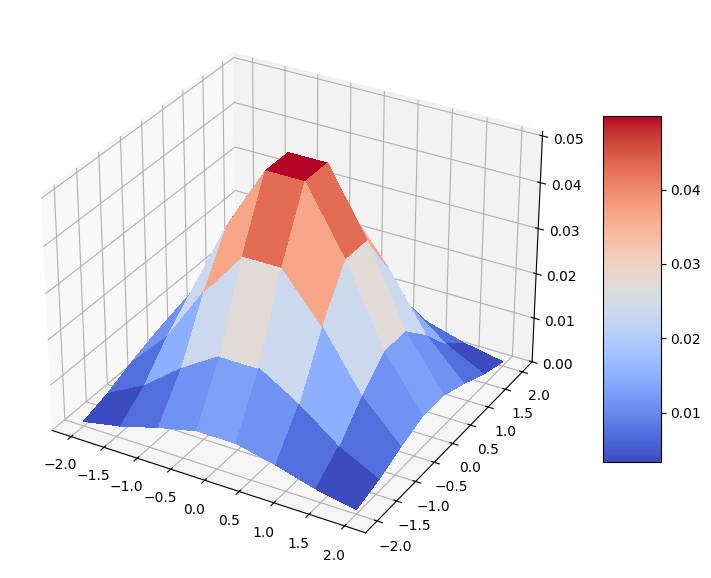

In [33]:


algorithm_globals.random_seed = 123456
_ = torch.manual_seed(123456)

num_dim = 2
num_discrete_values = 8
num_qubits = num_dim * int(np.log2(num_discrete_values))

coords = np.linspace(-2, 2, num_discrete_values)
rv = multivariate_normal(mean=[0.0, 0.0], cov=[[1,0], [0, 1]], seed=algorithm_globals.random_seed)
grid_elements = np.transpose([np.tile(coords, len(coords)), np.repeat(coords, len(coords))])
prob_data = rv.pdf(grid_elements)
prob_data = prob_data/np.sum(prob_data)

mesh_x, mesh_y = np.meshgrid(coords, coords)
grid_shape = (num_discrete_values, num_discrete_values)

fig, ax = plt.subplots(figsize=(9,9), subplot_kw={"projection":"3d"})
prob_grid = np.reshape(prob_data, grid_shape)
surf = ax.plot_surface(mesh_x, mesh_y, prob_grid, cmap=cm.coolwarm, linewidth= 0, antialiased = False)
fig.colorbar(surf, shrink=0.5, aspect = 6)

plt.show()

C:\Users\kafar\AppData\Local\Temp\ipykernel_25196\493380952.py:4: DeprecationWarning: The class ``qiskit.circuit.library.n_local.efficient_su2.EfficientSU2`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.efficient_su2 instead.
  ansatz = EfficientSU2(num_qubits, reps=6)


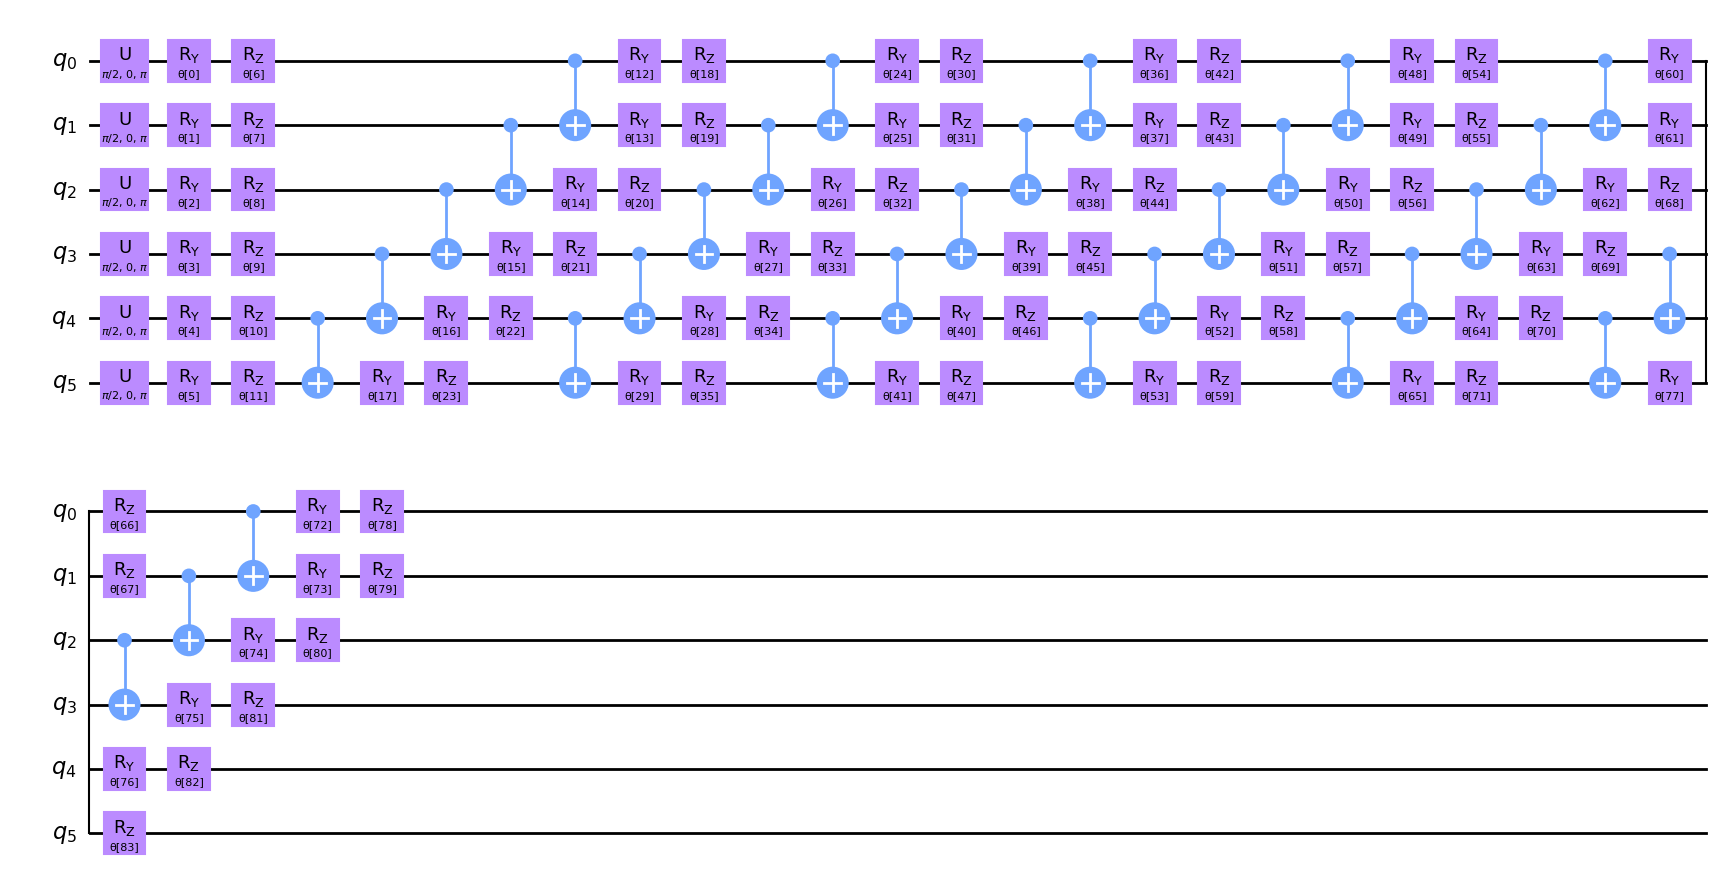

In [37]:
qc = QuantumCircuit(num_qubits)
qc.h(qc.qubits)

ansatz = EfficientSU2(num_qubits, reps=6)
qc.compose(ansatz, inplace=True)

qc.decompose().draw('mpl', style='clifford')

In [ ]:
qc.num_parameters
sampler = Sampler()



In [15]:
# print(coords)
# print(grid_elements)
# print(np.tile(coords, len(coords)))
# print(np.repeat(coords, len(coords)))
# print(np.transpose([[1, 2], [1,2]]))